# Association rule learning demo
**written by navid razman**

In [1]:
%cd ..

/home/jovyan/work/s


In [2]:
# # ------------- import needed library ----
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load chess `Data`

In [3]:
path = r'./data/chess.dat'
transactions = []
try:
    with open(path) as file:
        for line in file.readlines():
            transactions.append(line.split())
        

except FileNotFoundError as error:
    print(error)
    
print('number of transactions',len(transactions))

transactions[0]

number of transactions 3196


['1',
 '3',
 '5',
 '7',
 '9',
 '11',
 '13',
 '15',
 '17',
 '19',
 '21',
 '23',
 '25',
 '27',
 '29',
 '31',
 '34',
 '36',
 '38',
 '40',
 '42',
 '44',
 '46',
 '48',
 '50',
 '52',
 '54',
 '56',
 '58',
 '60',
 '62',
 '64',
 '66',
 '68',
 '70',
 '72',
 '74']

In [4]:
# ------------ generating stats -------------------------------------------------
min_sup = .7
min_conf = .8

stat_cols = ['Implementation name', '# of frequent itemset', 'time [frequent itemset]',\
             '# of association rules', 'time [extracting rules]','total time']
stats = []

## 2 `Apriori` Algorithm 

In [5]:
from src.Apriori import my_apriori

In [6]:
# -------------- get frequent itemset --------------------------------------------
import time

start_time = time.perf_counter() # for counting time

frequent_itemsets = { k:freq_itemset for k, freq_itemset in my_apriori(transactions, min_sup) }

for k, freq_itemset in frequent_itemsets.items():
    print( k, len(freq_itemset))
    
number_of_fi = sum ( ( len(freq_itemset) for k, freq_itemset in frequent_itemsets.items() ) )
print( 'number of extracted frequent itemsets:', number_of_fi )
    
end_time = time.perf_counter()
print(f'Time takes to get frequent itemset :',f'{end_time - start_time:.4f} seconds')

stats.append(['my Apriori Implementation',number_of_fi ,end_time - start_time]) # save stats

1 24
2 238
3 1237
4 3857
5 7891
6 11125
7 11113
8 7916
9 3895
10 1216
11 204
12 14
13 1
number of extracted frequent itemsets: 48731
Time takes to get frequent itemset : 17.6049 seconds


In [7]:
frequent_itemsets[1]

{('72',): 2345,
 ('74',): 2407,
 ('17',): 2500,
 ('31',): 2526,
 ('46',): 2556,
 ('44',): 2612,
 ('64',): 2631,
 ('42',): 2714,
 ('3',): 2839,
 ('25',): 2860,
 ('9',): 2874,
 ('5',): 2971,
 ('48',): 3013,
 ('56',): 3021,
 ('66',): 3021,
 ('34',): 3040,
 ('62',): 3060,
 ('7',): 3076,
 ('36',): 3099,
 ('60',): 3149,
 ('40',): 3170,
 ('29',): 3181,
 ('52',): 3185,
 ('58',): 3195}

### 2.1 **`Rule` Generation**
Generate Rules from Apriori frequent itemsets

In [8]:
from src.Apriori import rules_my_apriori

In [9]:
# -------------- get rules --------------------------------------------
import time

start_time = time.perf_counter() # for counting time

rules = [ r for r in rules_my_apriori(frequent_itemsets, min_conf) ]

print('number of extracted association rules:',len(rules))
    
end_time = time.perf_counter()
print(f'Time takes to get association rules :', f'{end_time - start_time:.4f} seconds')

stats[0].extend([len(rules),end_time - start_time])     # save stats
stats[0].append(stats[0][2]+stats[0][4])                # add total time

number of extracted association rules: 6710303
Time takes to get association rules : 18.0607 seconds


In [10]:
rules[0]

(('72',), ('66',), 1.0)

In [11]:
rules = [] # clear memory
frequent_itemsets = [] # clear memory

## 3 `FP-Growth` Algorithm

In [12]:
from src.FP_Growth import my_fpgrowth

In [13]:
# -------------- get frequent itemset --------------------------------------------
import time

start_time = time.perf_counter() # for counting time
    
frequent_itemsets = my_fpgrowth(transactions, min_sup)

print( 'number of extracted frequent itemsets:', len(frequent_itemsets) )
    
end_time = time.perf_counter()
print(f'Time takes to get frequent itemset :', f'{end_time - start_time:.4f} seconds')

stats.append(['my FP-Growth Implementation',len(frequent_itemsets) ,end_time - start_time]) # save stats

number of extracted frequent itemsets: 48731
Time takes to get frequent itemset : 0.7271 seconds


In [14]:
res1 = [ key for key,value in filter(lambda x:len(x[0])==1,frequent_itemsets.items()) ]
print(1, len(res1))

1 24


In [15]:
frequent_itemsets[('66', '72')]

2345

### 3.1 `Rule` Generation
Generate Rules from FP-Growth frequent itemsets

In [16]:
from src.FP_Growth import rules_my_fpgrowth

In [17]:
# -------------- get rules --------------------------------------------
import time

start_time = time.perf_counter() # for counting time

rules = [ r for r in rules_my_fpgrowth(frequent_itemsets, min_conf) ]

print('number of extracted association rules:',len(rules))
    
end_time = time.perf_counter()
print(f'Time takes to get association rules :', f'{end_time - start_time:.4f} seconds')

stats[1].extend([len(rules) ,end_time - start_time])       # save stats
stats[1].append(stats[1][2]+stats[1][4])                   # add total time

number of extracted association rules: 6710303
Time takes to get association rules : 20.3086 seconds


In [18]:
rules[0]

(('72',), ('66',), 1.0)

In [19]:
rules = [] # clear memory
frequent_itemsets = [] # clear memory

## 4 compare with other Implementation

### 4.1 `Efficient-Apriori` Implementation

In [20]:
# --------- install package ----------
!pip install efficient-apriori

In [21]:
# -------- show package details -------
!pip show efficient-apriori

Name: efficient_apriori
Version: 2.0.6
Summary: An efficient Python implementation of the Apriori algorithm.
Home-page: https://github.com/tommyod/Efficient-Apriori
Author: 
Author-email: tommyod <tommy.odland@gmail.com>
License: MIT License

Copyright (c) 2018 Tommy

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICU

In [22]:
# -------------- get frequent itemset --------------------------------------------
from efficient_apriori import apriori as efficient_apriori

import time

start_time = time.perf_counter() # for counting time

itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=min_conf, max_length=13)

number_of_fi =  sum ( ( len(itemsets[i]) for i in itemsets ) ) # number of frequent_itemsets

print( 'number of extracted frequent itemsets:', number_of_fi )
print('number of extracted association rules:', len(rules) )

end_time = time.perf_counter()
print(f'Time takes to get frequent itemset and rules :',f'{end_time - start_time:.4f} seconds')

stats.append(['Efficient-Apriori Implementation', number_of_fi ,np.nan,\
              len(rules),np.nan ,end_time - start_time]) # save stats

number of extracted frequent itemsets: 48731
number of extracted association rules: 6710303
Time takes to get frequent itemset and rules : 110.5751 seconds


In [23]:
itemsets[1]

{('3',): 2839,
 ('5',): 2971,
 ('7',): 3076,
 ('9',): 2874,
 ('17',): 2500,
 ('25',): 2860,
 ('29',): 3181,
 ('31',): 2526,
 ('34',): 3040,
 ('36',): 3099,
 ('40',): 3170,
 ('42',): 2714,
 ('44',): 2612,
 ('46',): 2556,
 ('48',): 3013,
 ('52',): 3185,
 ('56',): 3021,
 ('58',): 3195,
 ('60',): 3149,
 ('62',): 3060,
 ('64',): 2631,
 ('66',): 3021,
 ('72',): 2345,
 ('74',): 2407}

In [24]:
rules[0]

{17} -> {29}

In [25]:
rules = []    # clear memory
itemsets = [] # clear memory

### 4.2 `mlxtend apriori` Implementation

In [26]:
# --------- install package ----------
!pip install mlxtend

In [27]:
# -------- show package details -------
!pip show mlxtend

Name: mlxtend
Version: 0.23.4
Summary: Machine Learning Library Extensions
Home-page: https://github.com/rasbt/mlxtend
Author: 
Author-email: Sebastian Raschka <mail@sebastianraschka.com>
License: BSD 3-Clause
Location: /opt/conda/lib/python3.13/site-packages
Requires: joblib, matplotlib, numpy, pandas, scikit-learn, scipy
Required-by: 


In [28]:
# ------------- trasfer data ------------------------------------------
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = transactions

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,1,10,11,12,13,14,15,16,17,18,...,69,7,70,71,72,73,74,75,8,9
0,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
1,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
2,True,False,False,True,True,False,False,True,True,False,...,False,True,True,False,True,False,True,False,False,True
3,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
4,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,False,True
3192,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,False,True
3193,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,False,True
3194,False,False,True,False,True,False,False,True,True,False,...,False,False,False,True,False,True,True,False,True,True


In [29]:
# -------------- get frequent itemset --------------------------------------------
from mlxtend.frequent_patterns import apriori

import time

start_time = time.perf_counter() # for counting time
    
frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)

print( 'number of extracted frequent itemsets:', len(frequent_itemsets) )
    
end_time = time.perf_counter()
print(f'Time takes to get frequent itemset :', f'{end_time - start_time:.4f} seconds')

stats.append(['mlxtend apriori Implementation',len(frequent_itemsets) ,end_time - start_time]) # save stats

number of extracted frequent itemsets: 48731
Time takes to get frequent itemset : 6.5598 seconds


In [30]:
frequent_itemsets.info()

frequent_itemsets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48731 entries, 0 to 48730
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   48731 non-null  float64
 1   itemsets  48731 non-null  object 
dtypes: float64(1), object(1)
memory usage: 761.6+ KB


,support,itemsets
0,0.782228,(17)
1,0.894869,(25)
2,0.995307,(29)
3,0.888298,(3)
4,0.790363,(31)
...,...,...
48726,0.705569,"(34, 36, 52, 7, 5, 60, 66, 62, 48, 58, 56, 29)"
48727,0.710263,"(34, 58, 52, 7, 5, 60, 66, 62, 48, 40, 56, 29)"
48728,0.720901,"(36, 58, 52, 7, 5, 60, 66, 62, 48, 40, 56, 29)"
48729,0.702753,"(34, 36, 58, 52, 7, 5, 60, 66, 62, 48, 40, 56)"


In [31]:
# -------------- get rules --------------------------------------------
from mlxtend.frequent_patterns import association_rules

import time

min_conf = 0.8

start_time = time.perf_counter() # for counting time

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

print('number of extracted association rules:',len(rules))
    
end_time = time.perf_counter()
print(f'Time takes to get association rules :', f'{end_time - start_time:.4f} seconds')

stats[3].extend([len(rules) ,end_time - start_time])       # save stats
stats[3].append(stats[3][2]+stats[3][4])                   # add total time

number of extracted association rules: 6709317
Time takes to get association rules : 85.8891 seconds


In [32]:
rules.info()

rules

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709317 entries, 0 to 6709316
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   antecedents         object 
 1   consequents         object 
 2   antecedent support  float64
 3   consequent support  float64
 4   support             float64
 5   confidence          float64
 6   lift                float64
 7   representativity    float64
 8   leverage            float64
 9   conviction          float64
 10  zhangs_metric       float64
 11  jaccard             float64
 12  certainty           float64
 13  kulczynski          float64
dtypes: float64(12), object(2)
memory usage: 716.6+ MB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(17),(29),0.782228,0.995307,0.777847,0.994400,0.999089,1.0,-0.000709,0.838101,-0.004169,0.778091,-0.193173,0.887958
1,(3),(17),0.888298,0.782228,0.710889,0.800282,1.023080,1.0,0.016037,1.090397,0.201962,0.740789,0.082903,0.854541
2,(17),(3),0.782228,0.888298,0.710889,0.908800,1.023080,1.0,0.016037,1.224804,0.103592,0.740789,0.183543,0.854541
3,(17),(34),0.782228,0.951189,0.743429,0.950400,0.999171,1.0,-0.000617,0.984093,-0.003798,0.750948,-0.016164,0.865989
4,(17),(36),0.782228,0.969650,0.752190,0.961600,0.991698,1.0,-0.006297,0.790376,-0.037016,0.752426,-0.265221,0.868667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709312,"(66, 62, 56)","(36, 34, 52, 7, 5, 60, 48, 58, 40, 29)",0.862015,0.788173,0.702128,0.814519,1.033427,1.0,0.022711,1.142043,0.234416,0.740594,0.124377,0.852674
6709313,"(66, 56, 48)","(36, 34, 52, 7, 5, 60, 62, 58, 40, 29)",0.844180,0.785044,0.702128,0.831727,1.059466,1.0,0.039409,1.277427,0.360213,0.757341,0.217176,0.863054
6709314,"(48, 62, 56)","(36, 34, 52, 7, 5, 60, 66, 58, 40, 29)",0.857322,0.788798,0.702128,0.818978,1.038260,1.0,0.025874,1.166718,0.258275,0.743785,0.142895,0.854551
6709315,"(5, 48)","(34, 36, 58, 52, 7, 60, 66, 62, 40, 56, 29)",0.872340,0.761890,0.702128,0.804878,1.056423,1.0,0.037500,1.220314,0.418375,0.753273,0.180539,0.863219


In [33]:
rules[ (rules.antecedents==frozenset(['72']))  & (rules.consequents==frozenset(['66'])) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
408,(72),(66),0.73373,0.945244,0.73373,1.0,1.057928,1.0,0.040176,inf,0.20564,0.776233,1.0,0.888117


In [34]:
rules.drop(rules.index, inplace=True)                             # clear memory
frequent_itemsets.drop(frequent_itemsets.index, inplace=True)     # clear memory 

### 4.3 `mlxtend fpgrowth` Implementation

In [35]:
# ------------- trasfer data ------------------------------------------
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = transactions

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,1,10,11,12,13,14,15,16,17,18,...,69,7,70,71,72,73,74,75,8,9
0,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
1,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
2,True,False,False,True,True,False,False,True,True,False,...,False,True,True,False,True,False,True,False,False,True
3,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
4,True,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,False,True
3192,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,False,True
3193,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,False,True
3194,False,False,True,False,True,False,False,True,True,False,...,False,False,False,True,False,True,True,False,True,True


In [36]:
# -------------- get frequent itemset --------------------------------------------
from mlxtend.frequent_patterns import fpgrowth

import time

start_time = time.perf_counter() # for counting time
    
frequent_itemsets = fpgrowth(df, min_support=min_sup, use_colnames=True)

print( 'number of extracted frequent itemsets:', len(frequent_itemsets) )
    
end_time = time.perf_counter()
print(f'Time takes to get frequent itemset :', f'{end_time - start_time:.4f} seconds')

stats.append(['mlxtend fpgrowth Implementation',len(frequent_itemsets) ,end_time - start_time]) # save stats

number of extracted frequent itemsets: 48731
Time takes to get frequent itemset : 472.3195 seconds


In [37]:
frequent_itemsets.info()

frequent_itemsets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48731 entries, 0 to 48730
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   48731 non-null  float64
 1   itemsets  48731 non-null  object 
dtypes: float64(1), object(1)
memory usage: 761.6+ KB


,support,itemsets
0,0.999687,(58)
1,0.996558,(52)
2,0.995307,(29)
3,0.991865,(40)
4,0.985294,(60)
...,...,...
48726,0.702753,"(58, 52, 7, 66, 72, 29)"
48727,0.702753,"(58, 52, 7, 60, 66, 72)"
48728,0.702753,"(7, 60, 66, 72, 58, 29)"
48729,0.702753,"(52, 7, 60, 66, 72, 29)"


In [38]:
# -------------- get rules --------------------------------------------
from mlxtend.frequent_patterns import association_rules

import time

min_conf = 0.8

start_time = time.perf_counter() # for counting time

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

print('number of extracted association rules:',len(rules))
    
end_time = time.perf_counter()
print(f'Time takes to get association rules :', f'{end_time - start_time:.4f} seconds')

stats[4].extend([len(rules) ,end_time - start_time])       # save stats
stats[4].append(stats[4][2]+stats[4][4])                   # add total time

number of extracted association rules: 6709317
Time takes to get association rules : 71.3424 seconds


In [39]:
rules.info()

rules

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709317 entries, 0 to 6709316
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   antecedents         object 
 1   consequents         object 
 2   antecedent support  float64
 3   consequent support  float64
 4   support             float64
 5   confidence          float64
 6   lift                float64
 7   representativity    float64
 8   leverage            float64
 9   conviction          float64
 10  zhangs_metric       float64
 11  jaccard             float64
 12  certainty           float64
 13  kulczynski          float64
dtypes: float64(12), object(2)
memory usage: 716.6+ MB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(52),(58),0.996558,0.999687,0.996245,0.999686,0.999999,1.0,-0.000001,0.996558,-0.000314,0.996245,-0.003454,0.998122
1,(58),(52),0.999687,0.996558,0.996245,0.996557,0.999999,1.0,-0.000001,0.999687,-0.003443,0.996245,-0.000313,0.998122
2,(58),(29),0.999687,0.995307,0.994994,0.995305,0.999999,1.0,-0.000001,0.999687,-0.004695,0.994994,-0.000313,0.997495
3,(29),(58),0.995307,0.999687,0.994994,0.999686,0.999999,1.0,-0.000001,0.995307,-0.000314,0.994994,-0.004715,0.997495
4,(52),(29),0.996558,0.995307,0.991865,0.995290,0.999984,1.0,-0.000016,0.996558,-0.004710,0.991865,-0.003454,0.995916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709312,"(7, 72)","(52, 60, 66, 58, 29)",0.702753,0.938986,0.702753,1.000000,1.064978,1.0,0.042878,inf,0.205263,0.748417,1.000000,0.874209
6709313,"(72, 60)","(52, 7, 66, 58, 29)",0.733730,0.904255,0.702753,0.957783,1.059195,1.0,0.039274,2.267892,0.209887,0.751422,0.559062,0.867473
6709314,"(72, 66)","(52, 7, 60, 58, 29)",0.733730,0.942428,0.702753,0.957783,1.016292,1.0,0.011266,1.363700,0.060207,0.721954,0.266701,0.851733
6709315,"(72, 29)","(52, 7, 60, 66, 58)",0.733730,0.905507,0.702753,0.957783,1.057731,1.0,0.038356,2.238246,0.204979,0.750418,0.553222,0.866935


In [40]:
rules[ (rules.antecedents==frozenset(['72']))  & (rules.consequents==frozenset(['66'])) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6704016,(72),(66),0.73373,0.945244,0.73373,1.0,1.057928,1.0,0.040176,inf,0.20564,0.776233,1.0,0.888117


In [41]:
rules.drop(rules.index, inplace=True)                             # clear memory
frequent_itemsets.drop(frequent_itemsets.index, inplace=True)     # clear memory 

## 5 show the `stats`

In [66]:
# --------------------- print stats -------------------------------
pd.DataFrame(data=stats, columns=stat_cols).iloc[:, [0, 1, 3, 2, 4, 5]].style\
    .hide(axis="index")\
    .highlight_max(subset=stat_cols[2::2], color='red', axis=0)\
    .highlight_min(subset=stat_cols[2::2], color='lightgreen', axis=0)\
    .highlight_max(subset=stat_cols[-1], color='red', axis=0)\
    .highlight_min(subset=stat_cols[-1], color='lightgreen', axis=0) 

Implementation name,# of frequent itemset,# of association rules,time [frequent itemset],time [extracting rules],total time
my Apriori Implementation,48731,6710303,17.604884,18.060699,35.665582
my FP-Growth Implementation,48731,6710303,0.727091,20.308588,21.035679
Efficient-Apriori Implementation,48731,6710303,nan,nan,110.575083
mlxtend apriori Implementation,48731,6709317,6.559831,85.889079,92.448911
mlxtend fpgrowth Implementation,48731,6709317,472.319489,71.342353,543.661841


## 5 draw graph with different `min sup`

In [43]:
# --------------- define limits for scores -------------------------
import time # for counting time

min_sups = np.linspace(1, 0, num=11)

# print(min_sups) # for testing 

time_limit = 150    # 2.5 minites

In [44]:
# --------------- creating time limit function --------------------------------------------
from contextlib import contextmanager
import threading
import _thread

class TimeoutException(Exception): pass

@contextmanager
def force_time_limit(seconds):
    timer = threading.Timer(seconds, lambda: _thread.interrupt_main())
    timer.start()
    try:
        yield
    except KeyboardInterrupt:
        raise TimeoutException("Timed out for operation")
    finally:
        # if the action ends in specified time, timer is canceled
        timer.cancel()
        
# ---------------- test the function --------------------------------------------------------
import time
from efficient_apriori import apriori as efficient_apriori

start_time = time.perf_counter() # for counting time

try:
    with force_time_limit(10):
        itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=min_conf, max_length=13)
    
except TimeoutException as e:
    print("Timed out!", time.perf_counter() - start_time)

Timed out! 10.009871829000076


In [45]:
# ---------------------- get the scores -------------------------------
my_apriori_scores = []

for min_sup in min_sups:
    
    start_time = time.perf_counter() # for counting time
    
    try:
        with force_time_limit(time_limit):
            
            frequent_itemsets = { k:freq_itemset for k, freq_itemset in my_apriori(transactions, min_sup) }
            
            end_time = time.perf_counter()
            
            my_apriori_scores.append(end_time - start_time)  # save score
            
            frequent_itemsets = []                          # clear memory
            
        
    except TimeoutException as e:
        break

In [46]:
my_apriori_scores = my_apriori_scores + [np.nan]*( len(min_sups) - len(my_apriori_scores) )

my_apriori_scores

[0.01970703599999979,
 0.15035881900007553,
 2.6164130470000373,
 17.20299473099999,
 96.32237067200003,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [47]:
# ---------------------- get the scores -------------------------------
my_fpgrowth_scores = []

for min_sup in min_sups:
    
    start_time = time.perf_counter() # for counting time
    
    try:
        with force_time_limit(time_limit):
            
            frequent_itemsets = my_fpgrowth(transactions, min_sup)
            
            end_time = time.perf_counter()                       
            
            my_fpgrowth_scores.append(end_time - start_time)    # save score
            
            frequent_itemsets = []                              # clear memory
        
    except TimeoutException as e:
        break

In [48]:
my_fpgrowth_scores = my_fpgrowth_scores + [np.nan]*( len(min_sups) - len(my_fpgrowth_scores) )

my_fpgrowth_scores

[0.3381815129998813,
 0.18308462999993935,
 0.3770317099999829,
 0.974852730000066,
 3.0341424939999797,
 13.917206073999978,
 76.81465965799998,
 nan,
 nan,
 nan,
 nan]

In [49]:
# ---------------------- get the scores -------------------------------
from mlxtend.frequent_patterns import apriori

mlxtend_apriori_scores = []

for min_sup in min_sups[:-6]:        # to much memory problems
    
    start_time = time.perf_counter() # for counting time
    
    try:
        with force_time_limit(time_limit):
            
            
            frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)
            
            end_time = time.perf_counter()
            
            mlxtend_apriori_scores.append(end_time - start_time)              # save score
            
            frequent_itemsets.drop(frequent_itemsets.index, inplace=True)     # clear memory 
        
    except TimeoutException as e:
        break

In [50]:
mlxtend_apriori_scores = mlxtend_apriori_scores + [np.nan]*( len(min_sups) - len(mlxtend_apriori_scores) )

mlxtend_apriori_scores

[0.006960725999988426,
 1.0715698060000705,
 0.5694885439997961,
 10.563349171000027,
 82.59628942500012,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [51]:
# ---------------------- get the scores -------------------------------
from mlxtend.frequent_patterns import fpgrowth

mlxtend_fpgrowth_scores = []

for min_sup in min_sups[:-5]:        # to much memory problems
    
    start_time = time.perf_counter() # for counting time
    
    try:
        with force_time_limit(time_limit):
            
            
            frequent_itemsets = fpgrowth(df, min_support=min_sup, use_colnames=True)
            
            end_time = time.perf_counter()
            
            mlxtend_fpgrowth_scores.append(end_time - start_time)             # save score
            
            frequent_itemsets.drop(frequent_itemsets.index, inplace=True)     # clear memory 
        
    except TimeoutException as e:
        break

In [57]:
mlxtend_fpgrowth_scores = mlxtend_fpgrowth_scores + [np.nan]*( len(min_sups) - len(mlxtend_fpgrowth_scores) )
mlxtend_fpgrowth_scores

[0.05042450700011614,
 5.049104212999964,
 72.20826513299994,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

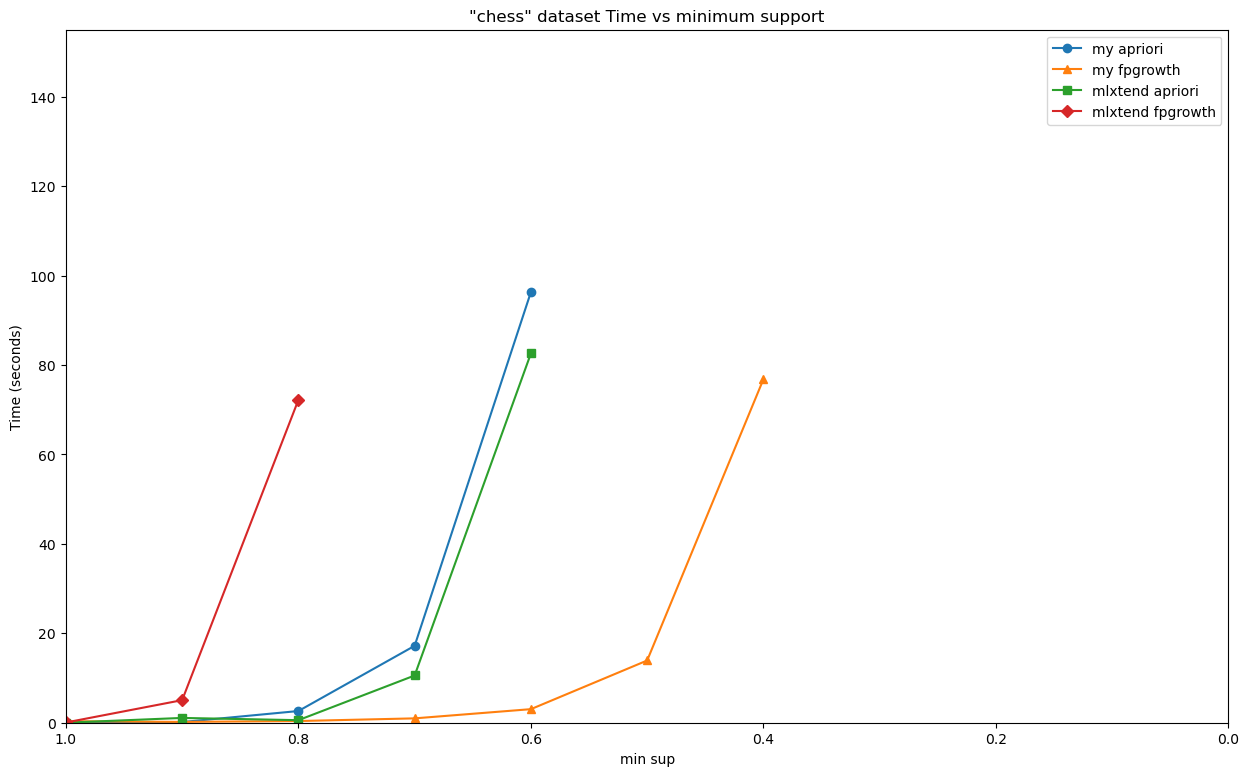

In [56]:
# plotting the line 1 points 
plt.subplots(figsize=(15,9))

# line 1 points
x = min_sups
y1 = my_apriori_scores
# plotting the line 1 points 
plt.plot(x, y1, label = "my apriori", marker='o')

# line 2 points
y2 = my_fpgrowth_scores 
# plotting the line 2 points 
plt.plot(x, y2, label = "my fpgrowth", marker='^')

# line 2 points
y3 = mlxtend_apriori_scores 
# plotting the line 2 points 
plt.plot(x, y3, label = "mlxtend apriori", marker='s')

# line 2 points
y4 = mlxtend_fpgrowth_scores 
# plotting the line 2 points 
plt.plot(x, y4, label = "mlxtend fpgrowth", marker='D')


plt.xlabel('min sup')
# Set the y axis label of the current axis.
plt.ylabel('Time (seconds)')
# Set a title of the current axes.
plt.title('"chess" dataset Time vs minimum support')
# show a legend on the plot
plt.legend()
# Display a figure.

plt.xlim(1, 0)                     # arrage x limitation
plt.ylim(0, time_limit+5)          # arrage y limitation
# plt.grid(True) # if u want grid view

plt.show()

**The Time for Rule generation is not counted for.**